<center> <h1>Module 2 - Simple Linear Regression Model Assumptions</h1> </center>
<center> <h2>Class Coding Analysis</h2> </center>

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.api as sm

## Data and Description

Recent increases in gas prices make buyers more prone to purchase a car with better gas mileage, as measured by the **miles per gallon (MPG)**. Because of this, car manufacturers are increasingly trying to produce the car that gives the best MPG. Complicating this process are the many factors that go into determining what gas mileage a car will achieve on the road.

One such factor is the **weight** of the car. While 
it is generally understood that heavier cars will experience fewer MPG, there is little understanding of how much an increase in weight will lead to a decrease MPG. By understanding this relationship, manufacturers will be able to perform a cost--benefit analysis that will assist them in their vehicle production.

The MPG data set contains measurements of the **weight (column 1)** (in pounds) and **MPG (column 2)** of 289 cars. Download the MPGData.txt file from Canvas, and put it in the same folder as this ipynb file.

Do the following (what we've done before):
1. Read in the data set, and look at a summary of the data.
2. Create a scatterplot of the data with Weight on the x-axis and MPG on the y-axis.
3. Apply linear regression to the data, and save the residuals and fitted values to the cars dataframe.

In [2]:
# Note: this code is all from Module 1
cars = pd.read_table("MPGData.txt", 
                     delimiter = ' ')
cars.describe()

Weight         MPG
count   289.000000  289.000000
mean   2535.038062   26.659170
std     484.110527    6.699974
min    1613.000000   13.000000
25%    2130.000000   21.000000
50%    2489.000000   26.000000
75%    2930.000000   31.500000
max    3465.000000   46.600000

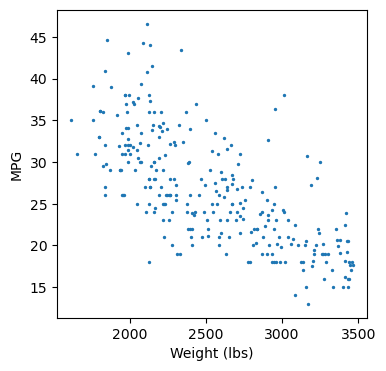

In [3]:
fig = plt.figure(figsize = (4, 4))
plt.scatter(x = cars['Weight'], 
            y = cars['MPG'], 
            s = 2)
plt.ylabel("MPG")
plt.xlabel("Weight (lbs)")
plt.show()

In [4]:
# Prepare data
y = cars['MPG']
X = sm.add_constant(cars['Weight'])

# Fit simple linear regression model using ordinary least squares
mod = sm.OLS(y, X)
res = mod.fit()
print(res.summary())

# Save the residuals and fitted values to the cars dataframe
cars['residuals'] = res.resid
cars['fittedvalues'] = res.fittedvalues

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     292.6
Date:                Thu, 11 Jan 2024   Prob (F-statistic):           1.04e-45
Time:                        16:10:21   Log-Likelihood:                -857.72
No. Observations:                 289   AIC:                             1719.
Df Residuals:                     287   BIC:                             1727.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         51.5872      1.484     34.773      0.0

## Diagnostics: Check That Assumptions are Met

### 1. (L) X vs Y is linear

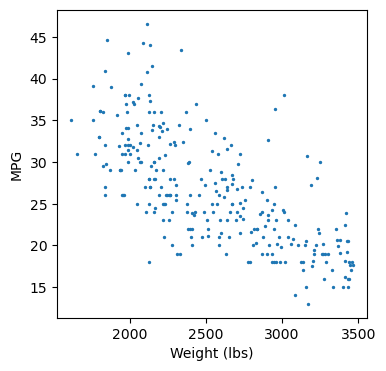

In [5]:
# Scatterplot
fig = plt.figure(figsize = (4, 4))
plt.scatter(x = cars['Weight'], 
            y = cars['MPG'], 
            s = 2)
plt.ylabel("MPG")
plt.xlabel("Weight (lbs)")
plt.show()

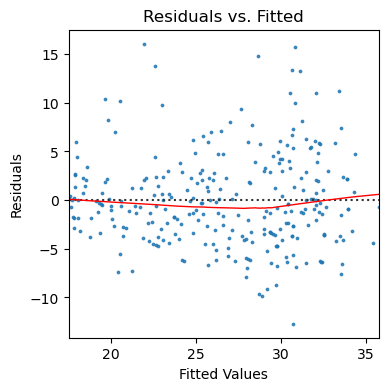

In [6]:
# Residuals vs. Fitted Values Plot
fig = plt.figure(figsize = (4, 4))
sns.residplot(x = cars['fittedvalues'], 
              y = cars['residuals'],
              lowess = True,
              scatter_kws = {'s': 3},
              line_kws = {'color': 'red', 'lw': 1})
plt.title("Residuals vs. Fitted")
plt.ylabel("Residuals")
plt.xlabel("Fitted Values")
plt.show()

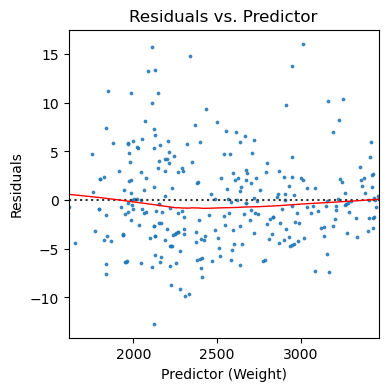

In [7]:
# Residuals vs. Predictor Plot
fig = plt.figure(figsize = (4, 4))
sns.residplot(x = cars['Weight'], 
              y = cars['residuals'],
              lowess = True,
              scatter_kws = {'s': 3},
              line_kws = {'color': 'red', 'lw': 1})
plt.title("Residuals vs. Predictor")
plt.xlabel("Predictor (Weight)")
plt.ylabel("Residuals")
plt.show()

### 2. (I) The residuals are independent across all values of Y

This assumption is difficult to test statistically. Generally, if you have a random sample, the residuals will be independent. Since the description of the data did not include how the cars were sampled, we do not know if this assumption is met.

*If* the observations in this data set were in a natural order, then we could use a sequence plot to assess dependence, *but a sequence plot is inappropriate here* since the data are not in a natural order. Below is the code to create a sequence plot, for your reference only (in case you want to use it for future data where it would be appropriate).

### 3. (N) The residuals are normally distributed and centered at zero

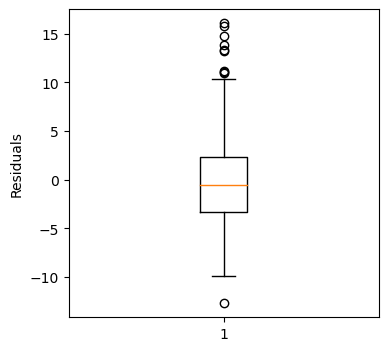

In [8]:
# Boxplot
fig = plt.figure(figsize = (4, 4))
plt.boxplot(cars['residuals'])
plt.ylabel("Residuals")
plt.show()

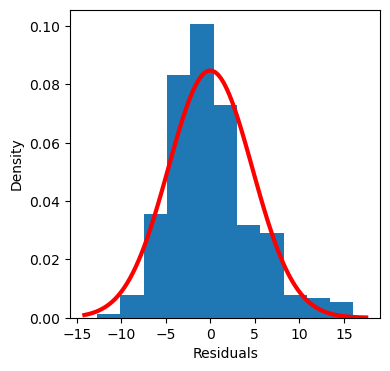

In [9]:
# Histogram
fig = plt.figure(figsize = (4, 4))

# plot histogram (density = True so that it's on the same scale as the normal distribution)
plt.hist(cars['residuals'], 
         density = True, 
         bins = 11)
plt.xlabel("Residuals")
plt.ylabel("Density")

# calculate mean and standard deviation
mean = np.mean(cars['residuals'])
sd = np.std(cars['residuals'])

# generate x values to plot
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)

# plot normal distribution curve
plt.plot(x,
         stats.norm.pdf(x, mean, sd), 
         color = 'r',
         lw = 3)
plt.show()

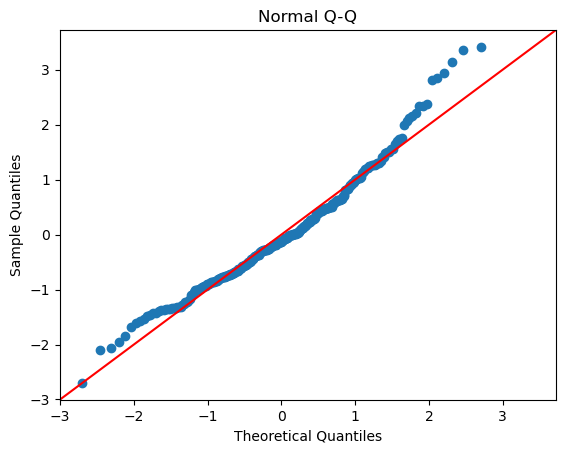

In [10]:
# Q-Q Plot (Normal Probability Plot)
sm.qqplot(cars['residuals'], 
          line = '45', 
          fit = True)
plt.title("Normal Q-Q")
plt.show()

In [11]:
# Shapiro-Wilk Test
stats.shapiro(cars['residuals'])

ShapiroResult(statistic=0.9703954458236694, pvalue=1.1287490451650228e-05)

### 4. (E) The residuals have constant variance across all values of x

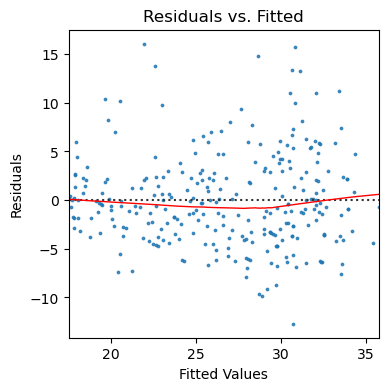

In [12]:
# Residuals vs. Fitted Values Plot
fig = plt.figure(figsize = (4, 4))
sns.residplot(x = cars['fittedvalues'], 
              y = cars['residuals'],
              lowess = True,
              scatter_kws = {'s': 3},
              line_kws = {'color': 'red', 'lw': 1})
plt.title("Residuals vs. Fitted")
plt.ylabel("Residuals")
plt.xlabel("Fitted Values")
plt.show()

### 5. (A) The model describes all observations (i.e., there are no influential points)

In [13]:
# dir(res)

In [14]:
# res.get_influence().dfbetas

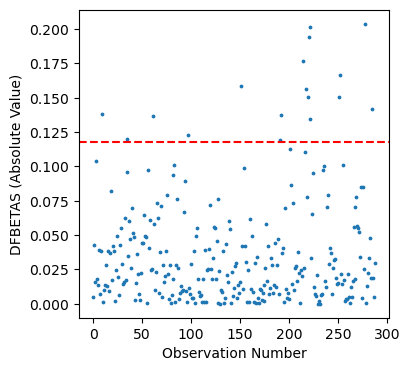

Weight   MPG  residuals  fittedvalues   dfbetas
278    3015  38.0  16.060480     21.939520  0.203869
220    3250  30.0  10.371325     19.628675  0.194560
252    3160  30.7  10.186320     20.513680  0.166681
219    2950  36.4  13.821310     22.578690  0.150727
251    3230  28.1   8.274657     19.825343  0.150350

In [15]:
# DFBETAS
cars['dfbetas'] = res.get_influence().dfbetas[:, 1]

fig = plt.figure(figsize = (4, 4))
plt.ylabel("DFBETAS (Absolute Value)")
plt.xlabel("Observation Number")
plt.scatter(cars.index, 
            np.abs(cars['dfbetas']), 
            s = 3)
plt.axhline(y = 2 / np.sqrt(len(cars)), 
            color = 'r', 
            linestyle = 'dashed')
plt.show()

# OPTIONAL: code to grab info about potential influential points
outliers_dfbetas = cars[np.abs(cars['dfbetas']) > 2 / np.sqrt(len(cars))]
outliers_dfbetas_sorted = outliers_dfbetas.sort_values(by = 'dfbetas', 
                                                       ascending = False)
outliers_dfbetas_sorted.head()

In [16]:
# res.get_influence().dffits

In [17]:
# len(res.params)

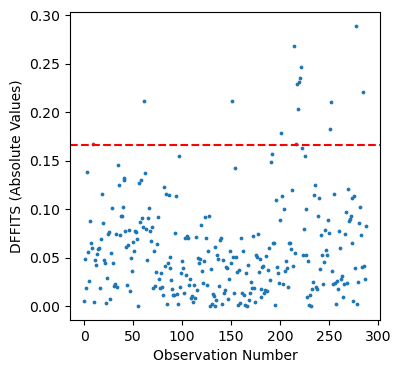

Weight   MPG  residuals  fittedvalues   dfbetas    dffits
278    3015  38.0  16.060480     21.939520  0.203869  0.289311
214    2110  46.6  15.761269     30.838731 -0.176904  0.267868
221    1850  44.6  11.204589     33.395411 -0.201558  0.246667
220    3250  30.0  10.371325     19.628675  0.194560  0.234838
219    2950  36.4  13.821310     22.578690  0.150727  0.231372

In [18]:
# DFFITS
cars['dffits'] = res.get_influence().dffits[0]

fig = plt.figure(figsize = (4, 4))
plt.ylabel("DFFITS (Absolute Values)")
plt.xlabel("Observation Number")
plt.scatter(cars.index, 
            np.abs(cars['dffits']), 
            s = 3)
plt.axhline(y = 2 * np.sqrt(len(res.params) / len(cars)), 
            color = 'r', 
            linestyle = 'dashed')
plt.show()

# OPTIONAL: code to grab info about potential influential points
outliers_dffits = cars[np.abs(cars['dffits']) > 2 * np.sqrt(len(res.params) / len(cars))]
outliers_dffits_sorted = outliers_dffits.sort_values(by = 'dffits', 
                                                     ascending = False)
outliers_dffits_sorted.head()

### 6. Additional predictor variables are unnecessary

This assumption is very likely not met. There are many other variables that could help predict MPG like the number of cylinders, vehical type, etc.

## Summarize Findings:

#### 1. x vs y is linear
This assumption is met.

#### 2. The residuals are independent across all values of y
We do not know if this assumption is met or not since we are lacking information on how the data was collected.

#### 3. The residuals are normally distributed and centered at zero
The residuals look *slightly* right skewed - we can likely do better. We will transform MPG to try to improve this.

#### 4. The residuals have constant variance across all values of x
The diagnostics indicate possible, *slight* heteroscedasticity. We may want to see if we can improve this by transforming MPG.

#### 5. The model describes all observations (i.e., there are no influential points)
This assumption is met.

#### 6. Additional predictor variables are unnecessary
This assumption is likely not met, as discussed above.

## Remedial Measures: “Fix” Unmet Assumptions

Given our assessment of the assumptions, we will want to perform some kind of transformation. Since the trend looks fairly linear, but the normality and equal variance assumptions could likley be improved, we will focus on transforming MPG (Y) instead of Weight (X).

To help us figure out which transformation to use, we'll look at which transformations help make MPG (Y) more normally distributed.

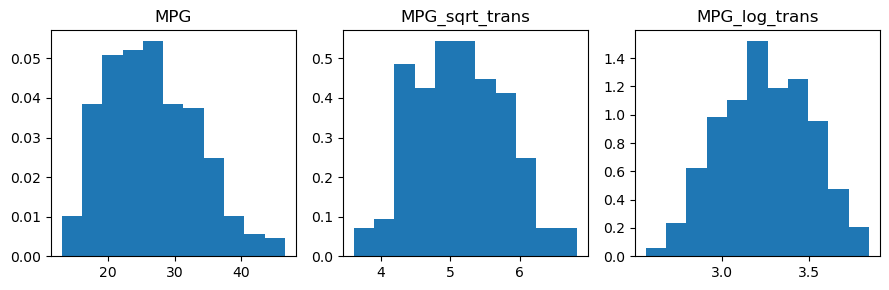

In [19]:
MPG_sqrt_trans = np.sqrt(cars['MPG'])
MPG_log_trans = np.log(cars['MPG'])

def hist_Y(variable, bin_size, ax, title):
    ax.hist(variable, density = True, bins = bin_size)
    ax.set_title(title)

fig, axes = plt.subplots(1, 3, figsize = (9, 3))
hist_Y(cars['MPG'], 11, axes[0], 'MPG')  # original MPG
hist_Y(MPG_sqrt_trans, 11, axes[1], 'MPG_sqrt_trans')  # sqrt(MPG)
hist_Y(MPG_log_trans, 11, axes[2], 'MPG_log_trans')  # log(MPG)
fig.tight_layout()
plt.show()

The log and square root transforms both make Y more normal (which should result in better behaved residuals). Since log is often easier to interpret, we will try using the log transform first. So, let’s transform MPG using the log transform, refit the model, and run the diagnostics again to gauge improvement.

In [20]:
# Fit model with log(Y) transform
cars['MPG_trans'] = MPG_log_trans
y = cars['MPG_trans']
X = sm.add_constant(cars['Weight'])

mod = sm.OLS(y, X)
res_trans = mod.fit()
print(res_trans.summary())

cars['residuals_trans'] = res_trans.resid
cars['fittedvalues_trans'] = res_trans.fittedvalues

                            OLS Regression Results                            
Dep. Variable:              MPG_trans   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     339.1
Date:                Thu, 11 Jan 2024   Prob (F-statistic):           1.54e-50
Time:                        16:10:22   Log-Likelihood:                 100.46
No. Observations:                 289   AIC:                            -196.9
Df Residuals:                     287   BIC:                            -189.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2262      0.054     78.443      0.0

In [34]:
# cars.head()

## Re-Check Assumptions with New Y Values

### 1. (L) X vs Y is linear

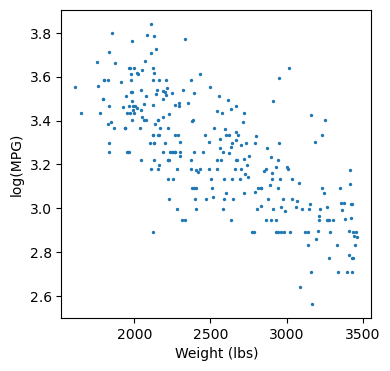

In [22]:
# Scatterplot
fig = plt.figure(figsize = (4, 4))
plt.scatter(x = cars['Weight'], 
            y = cars['MPG_trans'],  # changed
            s = 2)
plt.ylabel("log(MPG)")  # changed
plt.xlabel("Weight (lbs)")
plt.show()

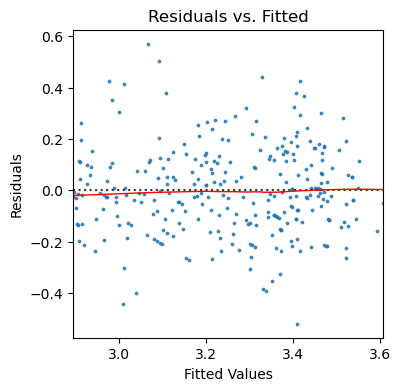

In [23]:
# Residuals vs. Fitted Values Plot
fig = plt.figure(figsize = (4, 4))
sns.residplot(x = cars['fittedvalues_trans'],  # changed
              y = cars['residuals_trans'],  # changed
              lowess = True,
              scatter_kws = {'s': 3},
              line_kws = {'color': 'red', 'lw': 1})
plt.title("Residuals vs. Fitted")
plt.ylabel("Residuals")
plt.xlabel("Fitted Values")
plt.show()

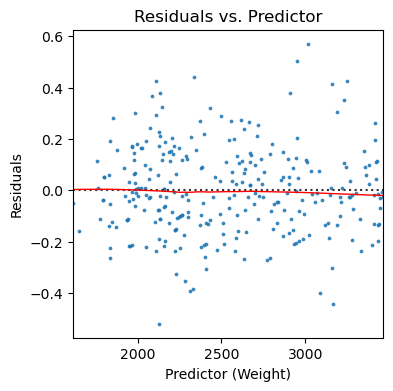

In [24]:
# Residuals vs. Predictor Plot
fig = plt.figure(figsize = (4, 4))
sns.residplot(x = cars['Weight'], 
              y = cars['residuals_trans'],  # changed
              lowess = True,
              scatter_kws = {'s': 3},
              line_kws = {'color': 'red', 'lw': 1})
plt.title("Residuals vs. Predictor")
plt.xlabel("Predictor (Weight)")
plt.ylabel("Residuals")
plt.show()

### 3. (N) The residuals are normally distributed and centered at zero

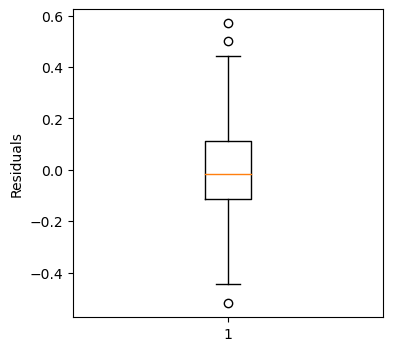

In [25]:
# Boxplot
fig = plt.figure(figsize = (4, 4))
plt.boxplot(cars['residuals_trans'])  # changed
plt.ylabel("Residuals")
plt.show()

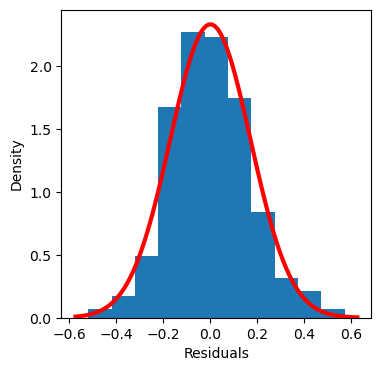

In [26]:
# Histogram
fig = plt.figure(figsize = (4, 4))

# plot histogram (density = True so that it's on the same scale as the normal distribution)
plt.hist(cars['residuals_trans'],  # changed
         density = True, 
         bins = 11)
plt.xlabel("Residuals")
plt.ylabel("Density")

# calculate mean and standard deviation
mean = np.mean(cars['residuals_trans'])  # changed
sd = np.std(cars['residuals_trans'])  # changed

# generate x values to plot
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)

# plot normal distribution curve
plt.plot(x,
         stats.norm.pdf(x, mean, sd), 
         color = 'r',
         lw = 3)
plt.show()

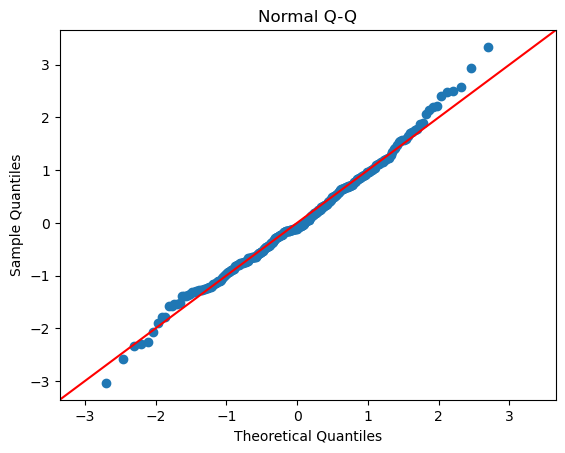

In [27]:
# Q-Q Plot (Normal Probability Plot)
sm.qqplot(cars['residuals_trans'],  # changed
          line = '45', 
          fit = True)
plt.title("Normal Q-Q")
plt.show()

In [28]:
# Shapiro-Wilk Test
stats.shapiro(cars['residuals_trans'])  # changed

ShapiroResult(statistic=0.9928095936775208, pvalue=0.17830541729927063)

### 4. (E) The residuals have constant variance across all values of x

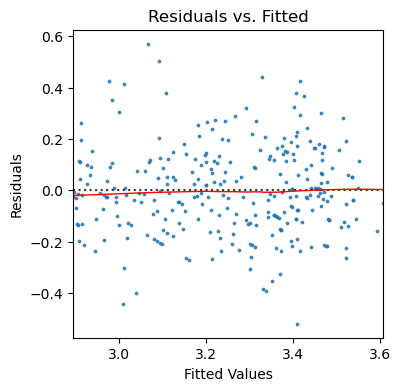

In [29]:
# Residuals vs. Fitted Values Plot
fig = plt.figure(figsize = (4, 4))
sns.residplot(x = cars['fittedvalues_trans'],  # changed
              y = cars['residuals_trans'],  # changed
              lowess = True,
              scatter_kws = {'s': 3},
              line_kws = {'color': 'red', 'lw': 1})
plt.title("Residuals vs. Fitted")
plt.ylabel("Residuals")
plt.xlabel("Fitted Values")
plt.show()

### 5. (A) The model describes all observations (i.e., there are no influential points)

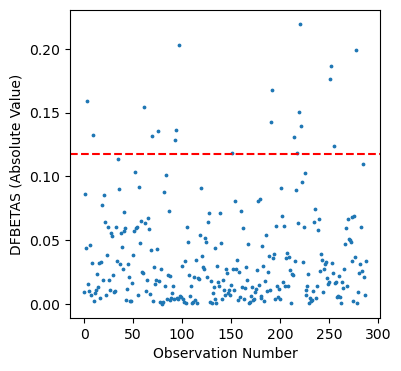

Weight   MPG  residuals  fittedvalues   dfbetas    dffits  MPG_trans  \
220    3250  30.0  10.371325     19.628675  0.194560  0.234838   3.401197   
278    3015  38.0  16.060480     21.939520  0.203869  0.289311   3.637586   
252    3160  30.7  10.186320     20.513680  0.166681  0.210702   3.424263   
251    3230  28.1   8.274657     19.825343  0.150350  0.183129   3.335770   
192    3420  23.9   5.943000     17.957000  0.137765  0.156969   3.173878   

     residuals_trans  fittedvalues_trans  dfbetas_trans  
220         0.424481            2.976717       0.219782  
278         0.570520            3.067066       0.199235  
252         0.412944            3.011319       0.186443  
251         0.351364            2.984406       0.176149  
192         0.262521            2.911357       0.167796

In [30]:
# DFBETAS
cars['dfbetas_trans'] = res_trans.get_influence().dfbetas[:, 1]  # changed

fig = plt.figure(figsize = (4, 4))
plt.ylabel("DFBETAS (Absolute Value)")
plt.xlabel("Observation Number")
plt.scatter(cars.index, 
            np.abs(cars['dfbetas_trans']),  # changed
            s = 3)
plt.axhline(y = 2 / np.sqrt(len(cars)), 
            color = 'r', 
            linestyle = 'dashed')
plt.show()

# OPTIONAL: code to grab info about potential influential points
outliers_dfbetas = cars[np.abs(cars['dfbetas_trans']) > 2 / np.sqrt(len(cars))]  # changed
outliers_dfbetas_sorted = outliers_dfbetas.sort_values(by = 'dfbetas_trans',  # changed 
                                                       ascending = False)
outliers_dfbetas_sorted.head()

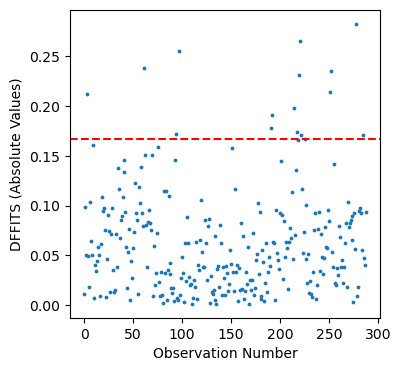

Weight   MPG  residuals  fittedvalues   dfbetas    dffits  MPG_trans  \
278    3015  38.0  16.060480     21.939520  0.203869  0.289311   3.637586   
220    3250  30.0  10.371325     19.628675  0.194560  0.234838   3.401197   
252    3160  30.7  10.186320     20.513680  0.166681  0.210702   3.424263   
219    2950  36.4  13.821310     22.578690  0.150727  0.231372   3.594569   
251    3230  28.1   8.274657     19.825343  0.150350  0.183129   3.335770   

     residuals_trans  fittedvalues_trans  dfbetas_trans  dffits_trans  
278         0.570520            3.067066       0.199235      0.282734  
220         0.424481            2.976717       0.219782      0.265281  
252         0.412944            3.011319       0.186443      0.235684  
219         0.502512            3.092057       0.150905      0.231644  
251         0.351364            2.984406       0.176149      0.214553

In [31]:
# DFFITS
cars['dffits_trans'] = res_trans.get_influence().dffits[0]  # changed

fig = plt.figure(figsize = (4, 4))
plt.ylabel("DFFITS (Absolute Values)")
plt.xlabel("Observation Number")
plt.scatter(cars.index, 
            np.abs(cars['dffits_trans']),  # changed 
            s = 3)
plt.axhline(y = 2 * np.sqrt(len(res_trans.params) / len(cars)),  # changed
            color = 'r', 
            linestyle = 'dashed')
plt.show()

# OPTIONAL: code to grab info about potential influential points
outliers_dffits = cars[np.abs(cars['dffits_trans']) > 2 * np.sqrt(len(res_trans.params) / len(cars))]  # changed
outliers_dffits_sorted = outliers_dffits.sort_values(by = 'dffits_trans',  # changed
                                                     ascending = False)
outliers_dffits_sorted.head()

## Repeat

We will not do this here, but if you wanted to see what the sqrt transformation would look like, you could try that, view the diagnostics, and from there determine the “best” model fit among all the models you've considered.

## Visualize

It can be informative to view the line (on the log scale) as what it looks like as a curve (on the regular scale). Here is how you plot the transformed regression model on original scale of the data.

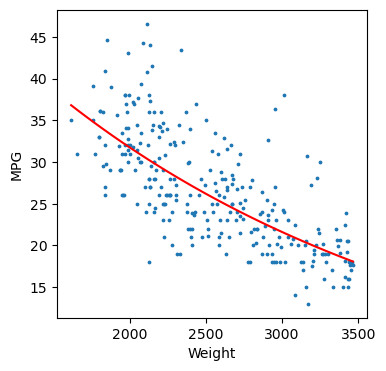

In [32]:
x = cars['Weight']
y = cars['MPG']

# Create a sequence of 100 Weight values
weight_values = np.linspace(cars['Weight'].min(), 
                            cars['Weight'].max(), 
                            num = 100)

# Predict log(MPG) using the linear model using the newly created Weight values
X = sm.add_constant(pd.DataFrame({'Weight': weight_values}))
log_mpg_preds = res_trans.predict(X)

# Back-transform the predictions (y_i-hat) to MPG
mpg_preds = np.exp(log_mpg_preds)

# Store results in a DataFrame for plotting
preds = pd.DataFrame({"Weight_values": weight_values, 
                      "MPG_preds": mpg_preds})

# Plot the predictions on the original scale
plt.figure(figsize = (4, 4))
plt.scatter(x, 
            y, 
            s = 3)
plt.plot(preds['Weight_values'],
         preds['MPG_preds'], 
         color = "r")
plt.xlabel("Weight")
plt.ylabel("MPG")
plt.show()

## Summary and Conclusions

*Always* start by plotting your data (exploratory data analysis: view data, create scatterplot, summarize data, etc.) before jumping into an analysis or fitting a model. We saw MPG and Weight looked to be linearly correlated, so we chose to fit a simple linear regression model to the data. Once the model was fit, we ran diagnostics to ensure the assumptions underlying the linear regression model were met. We found some evidence to suggest that the residuals were not homoscedastic or normally distributed. To fix this, we determined the log transform would be the best transformation for MPG. We applied this transformation, refit the model, and re-checked the assumptions. The assumptions all appear to be met. In practice, we could try additional transformations, compare the transformed models, and then pick the best model. Once we have a model that satisfies the assumptions, we can look at our model coefficients and p-values and safely draw conclusions.

Note: When interpreting the model coefficients, remember they are on a transformed scale. For example, to interpret the slope of -0.0004 from the transformed model, we would say, “Average MPG decreases by 0.04% for every 1 pound increase in Weight.”